# Road Accident Prediction and Classification
###### By Nitish Giri & Pranav Sharma   


In [39]:
import os


## Importing Data and cleaning


In [40]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from mpl_toolkits.basemap import Basemap
from sklearn.model_selection import TimeSeriesSplit
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [41]:
accidents = pd.read_csv('/content/Accidents.csv',index_col='Accident_Index')
casualties= pd.read_csv('/content/Casualties.csv' , error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
vehicles= pd.read_csv('/content/Vehicles.csv', error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)

In [42]:
!pip install tqdm
import requests
import os
from tqdm import tqdm

In [43]:
# function for input to tqdm
def download_dataset(file_url, name):
    r = requests.get(file_url, stream=True) 

    with open(name, "wb") as file: 
        for chunk in tqdm(r.iter_content(chunk_size=1024)): 
             if chunk: file.write(chunk)
                
    print('Download complete.')

In [44]:
print(os.listdir('.'))

['.config', 'Casualties.csv', 'Accidents.csv', 'CasualtiesBig.csv', 'AccidentsBig.csv', 'VehiclesBig.csv', 'Vehicles.csv', 'sample_data']


In [45]:
accidents = pd.read_csv('/content/AccidentsBig.csv',index_col='Accident_Index')
vehicles= pd.read_csv('/content/VehiclesBig.csv', error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
casualties = pd.read_csv('/content/CasualtiesBig.csv', error_bad_lines=False, index_col='Accident_Index', warn_bad_lines=False)
print('Loaded')


Loaded


In [46]:
print("accidents")
print("size=",accidents.size)
print(accidents.shape)
accidents.head()

accidents
size= 4987714
(160894, 31)


,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,...,0.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,E01002849
200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,...,0.0,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002909
200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,...,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002857
200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002840
200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,...,0.0,0.0,7.0,1.0,2.0,0.0,0.0,1.0,1.0,E01002863


In [47]:
print("vehicles")
print("size=",vehicles.size)
print(vehicles.shape)
vehicles.head()

vehicles
size= 7403445
(352545, 21)


,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,1,9,0,18,0,0,0,0.0,0.0,0.0,...,1.0,15.0,2.0,74.0,10.0,-1.0,-1.0,-1.0,7.0,1.0
200501BS00002,1,11,0,4,0,3,0,0.0,0.0,0.0,...,1.0,1.0,1.0,42.0,7.0,8268.0,2.0,3.0,-1.0,-1.0
200501BS00003,1,11,0,17,0,0,0,4.0,0.0,0.0,...,1.0,1.0,1.0,35.0,6.0,8300.0,2.0,5.0,2.0,1.0
200501BS00003,2,9,0,2,0,0,0,0.0,0.0,0.0,...,1.0,15.0,1.0,62.0,9.0,1762.0,1.0,6.0,1.0,1.0
200501BS00004,1,9,0,18,0,0,0,0.0,0.0,0.0,...,1.0,15.0,2.0,49.0,8.0,1769.0,1.0,4.0,2.0,1.0


In [48]:
print("casualties")
print("size=",casualties.size)
print(casualties.shape)
casualties.head()

casualties
size= 7285628
(520402, 14)


,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,
200501BS00001,1,1,3.0,1.0,37.0,7.0,2.0,1.0,1.0,0.0,0.0,-1.0,0.0,1.0
200501BS00002,1,1,2.0,1.0,37.0,7.0,3.0,0.0,0.0,0.0,4.0,-1.0,11.0,1.0
200501BS00003,2,1,1.0,1.0,62.0,9.0,3.0,0.0,0.0,0.0,0.0,-1.0,9.0,1.0
200501BS00004,1,1,3.0,1.0,30.0,6.0,3.0,5.0,2.0,0.0,0.0,-1.0,0.0,1.0
200501BS00005,1,1,1.0,1.0,49.0,8.0,3.0,0.0,0.0,0.0,0.0,-1.0,3.0,-1.0


In [49]:
accidents = accidents.join(vehicles, how='outer')
print("done joining")
print(accidents.shape)

done joining
(352545, 52)


#joining the tables

## Identifying Missing Values

there are two types of missing values '-1' and 'Nan'. 

In [50]:
#combining two columns
accidents['Date_time'] = accidents['Date'] +' '+ accidents['Time']

for col in accidents.columns:
    accidents = (accidents[accidents[col]!=-1])
    #print(col ,' ' , x)
for col in casualties.columns:
    casualties = (casualties[casualties[col]!=-1])

accidents['Date_time'] = pd.to_datetime(accidents.Date_time)
accidents.drop(['Date','Time'],axis =1 , inplace=True)
accidents.dropna(inplace=True)

# Data Visualization

Text(0.5, 0, '0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday')

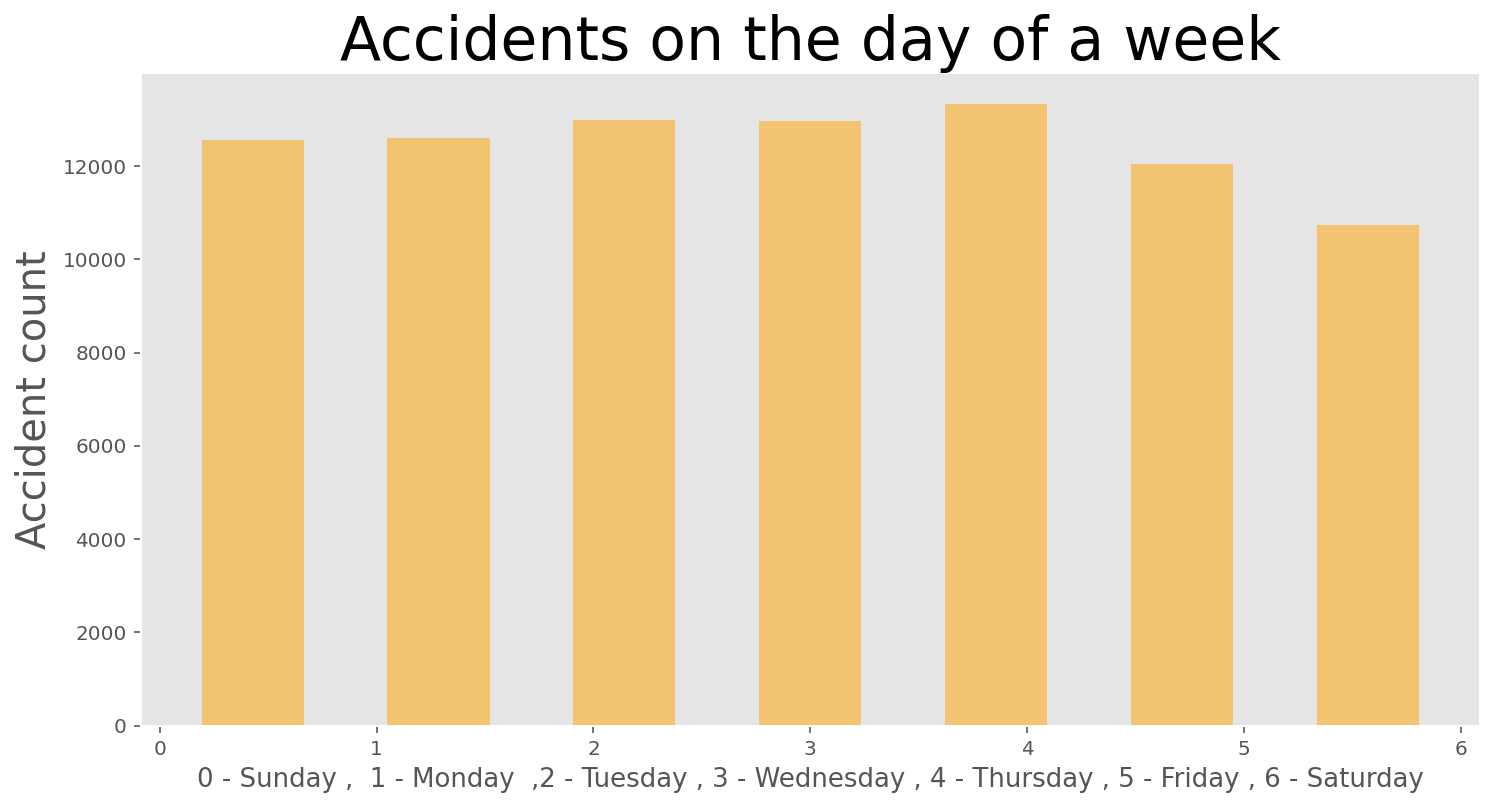

In [51]:
plt.figure(figsize=(12,6))
accidents.Date_time.dt.dayofweek.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'orange')
plt.title('Accidents on the day of a week' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday' , fontsize = 13)

As we can see that thursday has the highest amount of accidents in this dataset from 2005 to 2015. We have to keep in mind that accidents numbers could be depending on traffic amount on particular day.

Text(0, 0.5, 'Accident count')

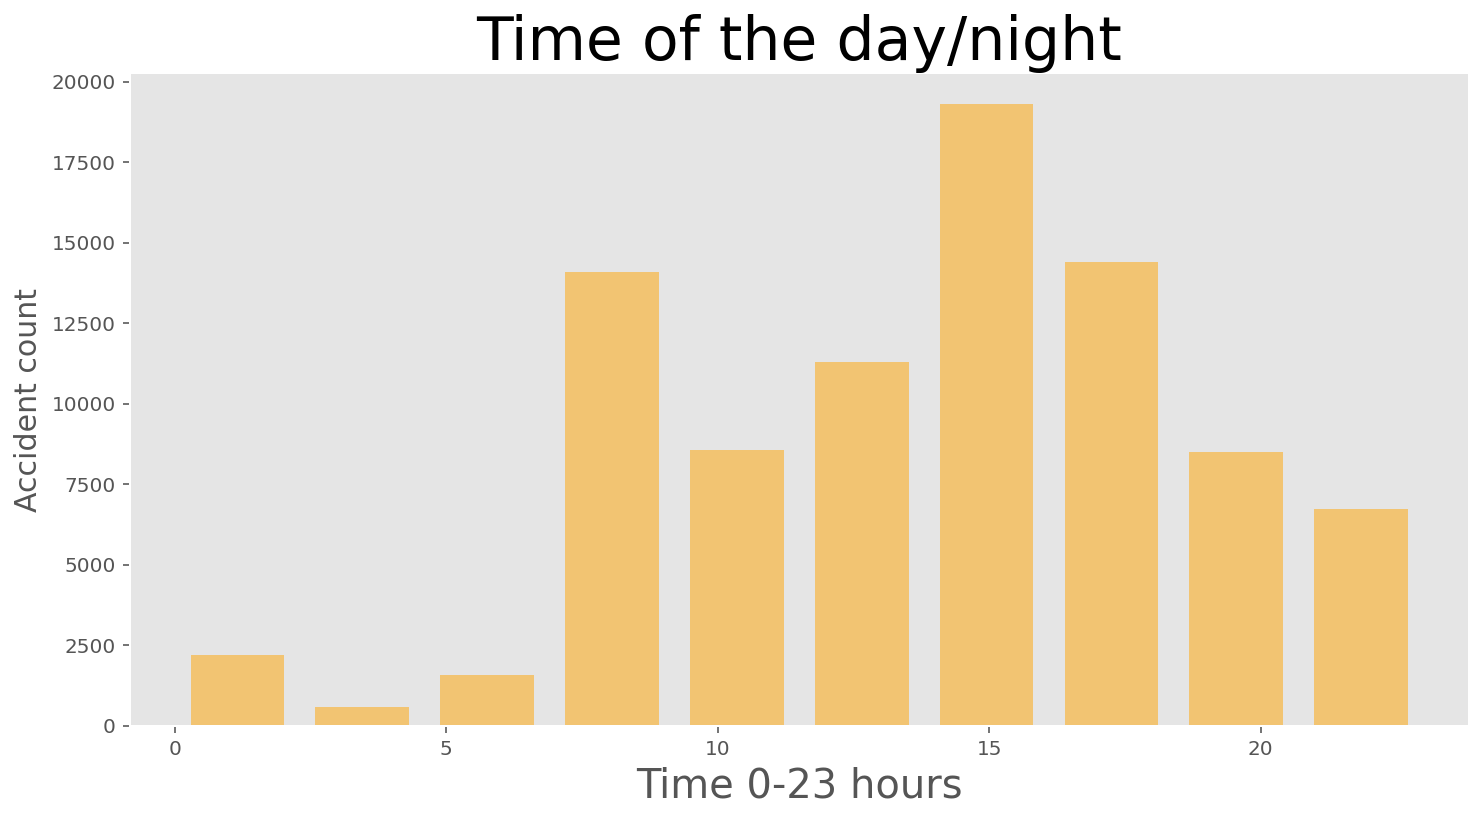

In [52]:
plt.figure(figsize=(12,6))
accidents.Date_time.dt.hour.hist(rwidth=0.75,alpha =0.50, color= 'orange')
plt.title('Time of the day/night',fontsize= 30)
plt.grid(False)
plt.xlabel('Time 0-23 hours' , fontsize = 20)
plt.ylabel('Accident count' , fontsize = 15)


We found out that the most of accidents happened around after noon. We can assume that this time of the day has the most traffic moving such as people leaving from work.



This is very interesting fact about this dataset. Most of the drivers age is around 225 to 35 who are involved in the accident. However, we do not know the number of drivers with age 25 to 35 on the road compare to other ages. Intutively, I would assume that the driver with age 25 to 35 are more in the number of drivers with different age.

Most of the accidents occured on the road where the speed limit is 30. I was expecting more accidents on highway or major roadways. Some of the accidents could be cause of stop sign, changing lanes or turning into parking lot etc.

## Co-relation between variables

Since our dataset is in numeric values. We can findout correlation between columns.

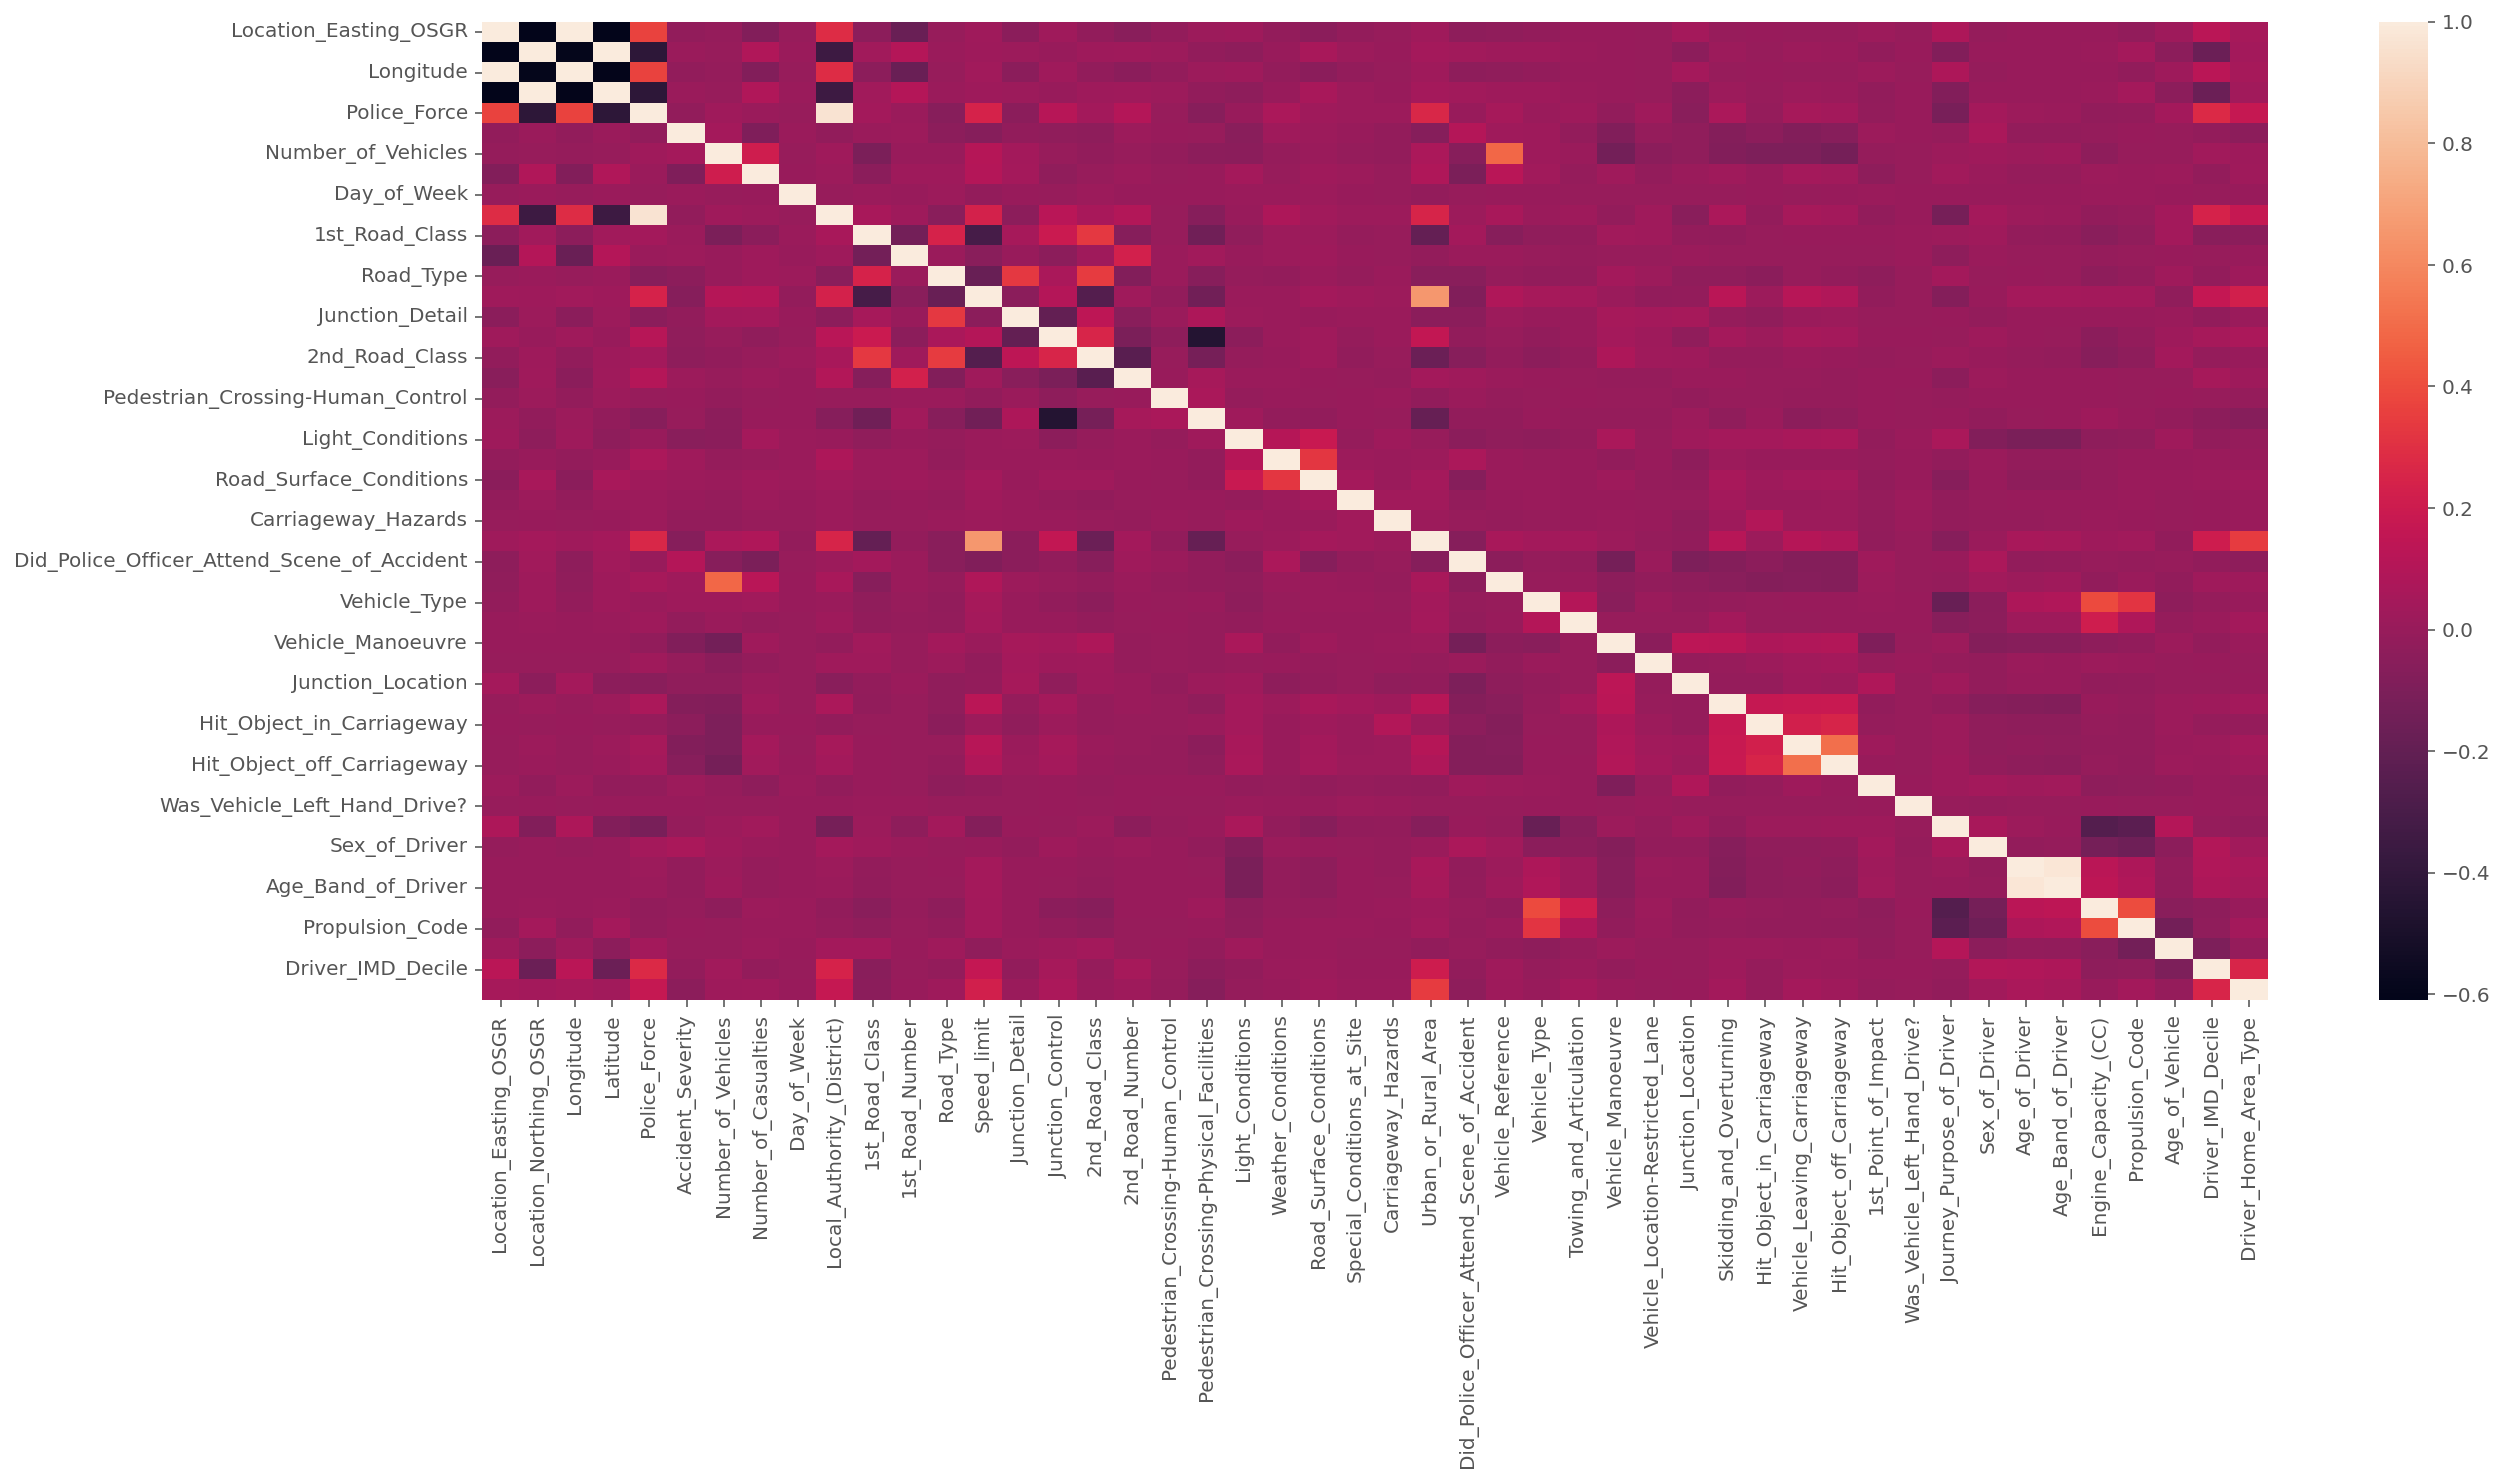

In [56]:
corr =  accidents.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)

As we see that there is not so much strong correlations between any variables. I was expecting weather condition to be strong correlation with any of the variable. 
- There is only one postiive strong correlation between speed limit and Urban or Rural Area. 

In [57]:
accidents_2014 = accidents[accidents.Date_time.dt.year ==2014]
accidents_2014_01 = accidents_2014[accidents_2014.Accident_Severity == 1]
accidents_2014_02 = accidents_2014[accidents_2014.Accident_Severity == 2]
accidents_2014_03 = accidents_2014[accidents_2014.Accident_Severity == 3]
print("done")

done


As we can see that most of fatal accidents happened locally within cities instead on highways. It could be the reason of the traffic is more congested locally than on highways.

# Machine Learning

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
print("done")

done


## Normalize the Data


done


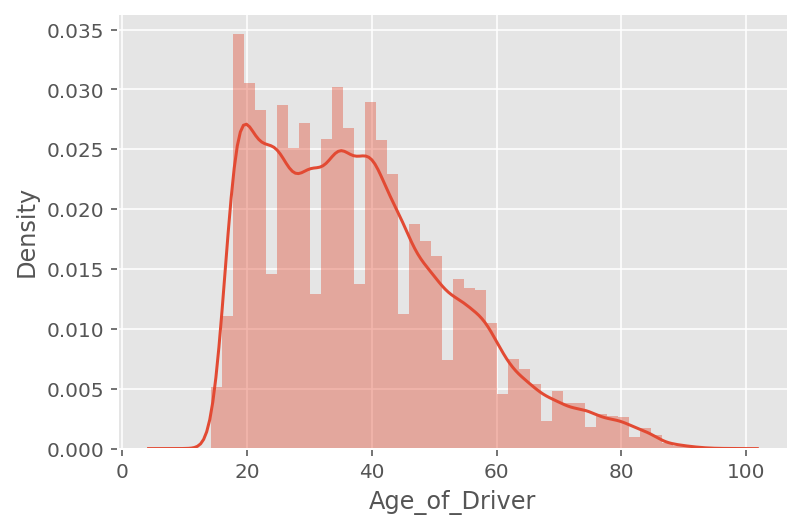

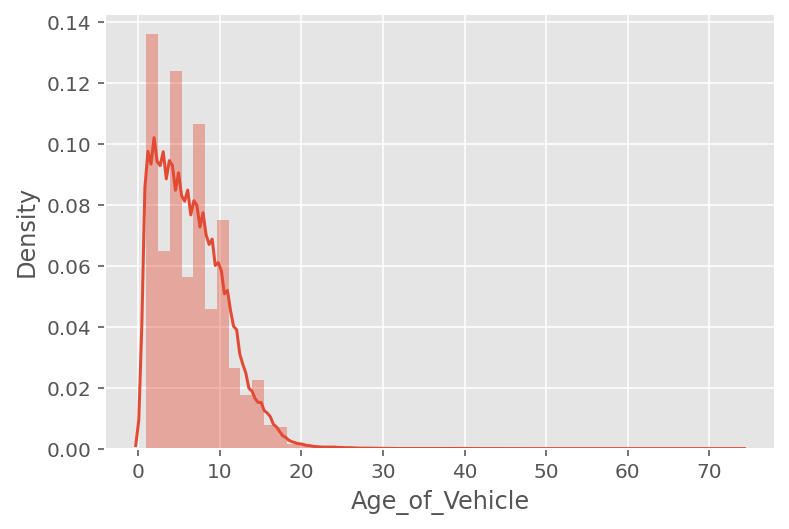

<Figure size 432x288 with 0 Axes>

In [61]:
sns.distplot(accidents['Age_of_Driver']);
fig = plt.figure()
sns.distplot(accidents['Age_of_Vehicle']);
fig = plt.figure()
print("done")

done


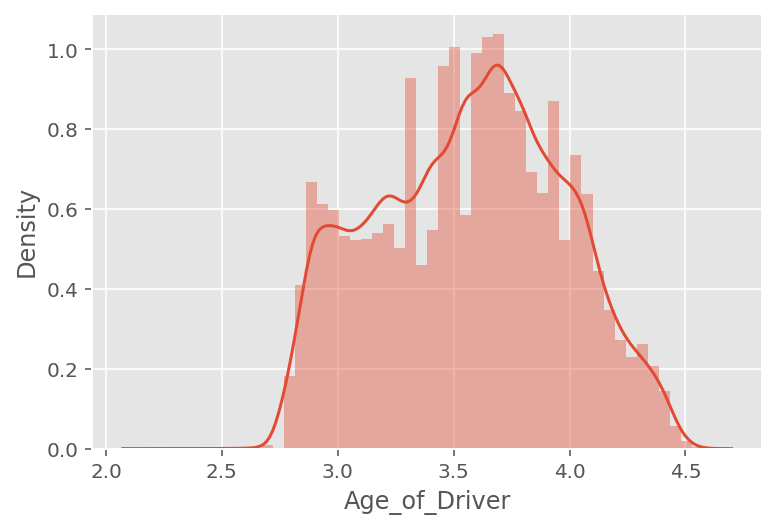

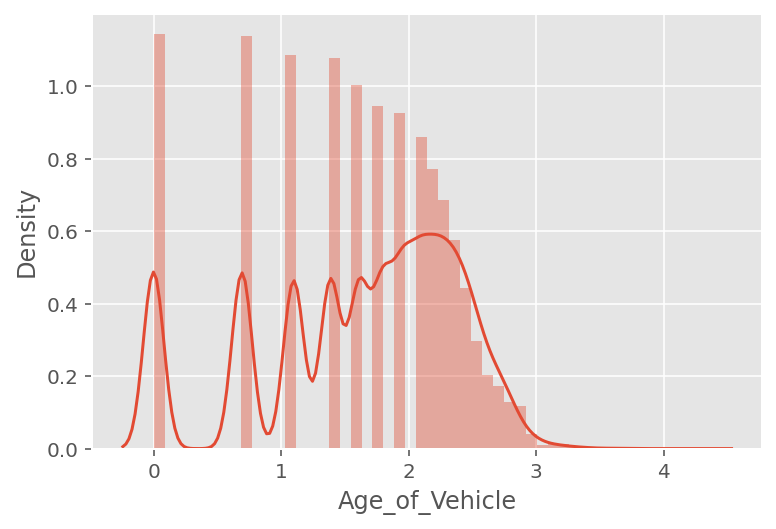

<Figure size 432x288 with 0 Axes>

In [62]:

accidents['Age_of_Driver'] = np.log(accidents['Age_of_Driver'])
accidents['Age_of_Vehicle'] = np.log(accidents['Age_of_Vehicle'])
sns.distplot(accidents['Age_of_Driver']);
fig = plt.figure()
sns.distplot(accidents['Age_of_Vehicle']);
fig = plt.figure()
print("done")

In [63]:
accidents.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Date_time
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00007,524220.0,180830.0,-0.211277,51.512695,1.0,3.0,2.0,1.0,5.0,12.0,...,15.0,1.0,3.713572,7.0,4266.0,1.0,1.386294,6.0,1.0,2005-01-13 20:40:00
200501BS00010,527350.0,177650.0,-0.167342,51.483420,1.0,3.0,2.0,2.0,7.0,12.0,...,15.0,1.0,3.555348,6.0,1998.0,1.0,2.564949,3.0,1.0,2005-01-15 22:43:00
200501BS00011,524550.0,180810.0,-0.206531,51.512443,1.0,3.0,2.0,5.0,7.0,12.0,...,1.0,1.0,3.737670,7.0,8268.0,2.0,0.693147,2.0,1.0,2005-01-15 16:00:00
200501BS00012,526240.0,178900.0,-0.182872,51.494902,1.0,3.0,1.0,1.0,1.0,12.0,...,15.0,1.0,3.526361,6.0,1988.0,1.0,1.791759,4.0,1.0,2005-01-16 00:42:00
200501BS00014,526170.0,177690.0,-0.184312,51.484044,1.0,3.0,2.0,1.0,3.0,12.0,...,15.0,2.0,2.944439,4.0,1124.0,1.0,2.079442,8.0,1.0,2005-01-25 20:48:00


## Spliting the data into training data and test data


In [64]:
accident_ml = accidents.drop('Accident_Severity' ,axis=1)
accident_ml = accident_ml[['Did_Police_Officer_Attend_Scene_of_Accident' , 'Age_of_Driver' ,'Vehicle_Type', 'Age_of_Vehicle','Engine_Capacity_(CC)','Day_of_Week' , 'Weather_Conditions' , 'Road_Surface_Conditions'
                          , 'Light_Conditions', 'Sex_of_Driver' ,'Speed_limit']]

accident_ml.head()

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(accident_ml.values, 
                                              accidents['Accident_Severity'].values,test_size=0.20, random_state=99)
print("done")

done


In [65]:
# y_train[100:200]
# print(np.argmin(y_train))
print(y_train[365])
print(X_train[365])

3.0
[1.00000000e+00 2.89037176e+00 9.00000000e+00 2.07944154e+00
 1.29900000e+03 6.00000000e+00 2.00000000e+00 2.00000000e+00
 1.00000000e+00 1.00000000e+00 3.00000000e+01]


In [66]:
# X_train[]
accident_ml.head()

,Did_Police_Officer_Attend_Scene_of_Accident,Age_of_Driver,Vehicle_Type,Age_of_Vehicle,Engine_Capacity_(CC),Day_of_Week,Weather_Conditions,Road_Surface_Conditions,Light_Conditions,Sex_of_Driver,Speed_limit
Accident_Index,,,,,,,,,,,
200501BS00007,1.0,3.713572,9,1.386294,4266.0,5.0,1.0,1.0,4.0,1.0,30.0
200501BS00010,1.0,3.555348,9,2.564949,1998.0,7.0,1.0,1.0,4.0,1.0,30.0
200501BS00011,1.0,3.737670,11,0.693147,8268.0,7.0,1.0,1.0,1.0,1.0,30.0
200501BS00012,1.0,3.526361,9,1.791759,1988.0,1.0,1.0,1.0,4.0,1.0,30.0
200501BS00014,1.0,2.944439,9,2.079442,1124.0,3.0,1.0,2.0,4.0,2.0,30.0


In [67]:
X_train[0]

array([1.00000000e+00, 4.18965474e+00, 9.00000000e+00, 2.89037176e+00,
       1.59800000e+03, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 3.00000000e+01])

## Random Forest

In [68]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

print("done")

Accuracy 88.46
              precision    recall  f1-score   support

         1.0   0.000000  0.000000  0.000000       151
         2.0   0.212121  0.024000  0.043121      1750
         3.0   0.892660  0.990089  0.938854     15539

    accuracy                       0.884576     17440
   macro avg   0.368260  0.338030  0.327325     17440
weighted avg   0.816643  0.884576  0.840844     17440

done


In [69]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

print("done")

Accuracy 88.46
              precision    recall  f1-score   support

         1.0   0.000000  0.000000  0.000000       151
         2.0   0.212121  0.024000  0.043121      1750
         3.0   0.892660  0.990089  0.938854     15539

    accuracy                       0.884576     17440
   macro avg   0.368260  0.338030  0.327325     17440
weighted avg   0.816643  0.884576  0.840844     17440

done


In [70]:
print(accident_ml.head())
print(X_train.shape)
print(X_train[0])
print("done")

                Did_Police_Officer_Attend_Scene_of_Accident  Age_of_Driver  \
Accident_Index                                                               
200501BS00007                                           1.0       3.713572   
200501BS00010                                           1.0       3.555348   
200501BS00011                                           1.0       3.737670   
200501BS00012                                           1.0       3.526361   
200501BS00014                                           1.0       2.944439   

                Vehicle_Type  Age_of_Vehicle  Engine_Capacity_(CC)  \
Accident_Index                                                       
200501BS00007              9        1.386294                4266.0   
200501BS00010              9        2.564949                1998.0   
200501BS00011             11        0.693147                8268.0   
200501BS00012              9        1.791759                1988.0   
200501BS00014              9     

In [71]:
Y_pred = random_forest.predict(X_test[365].reshape(1, -1))
print(Y_pred)

[3.]
